In [32]:
# ARTIFICIAL NEURAL NETWORKS :

In [33]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# Data Preparation:

In [35]:
df=pd.read_csv('Alphabets_data.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [36]:
# 1. Data Exploration and Preprocessing:

In [37]:
df.shape

(20000, 17)

In [38]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [39]:
# Summary Statistics:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


In [40]:
# Checking for missing values:
# There are no missing values found.
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

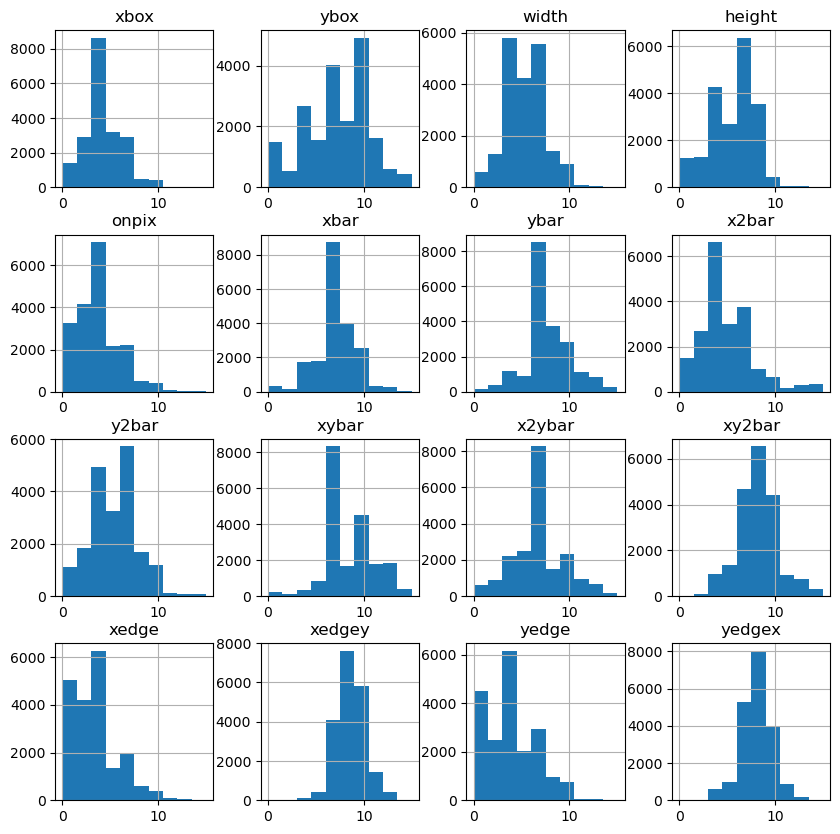

In [41]:
# Plot histograms for numerical feature
df.hist(figsize=(10, 10))
plt.show()

In [42]:
# We can use standardization here as most of the histograms are normally distributed:

In [43]:
# split the df into target and features:
numdf=df.drop('letter',axis='columns')
target=df['letter']

In [44]:
numdf.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [45]:
target.head()

0    T
1    I
2    D
3    N
4    G
Name: letter, dtype: object

In [46]:
# Standardization:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
scalednum=scaler.fit_transform(numdf)
scalednumdf=pd.DataFrame(scalednum,columns=numdf.columns)

In [48]:
# Label encoding for target:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)
from tensorflow.keras.utils import to_categorical
y = to_categorical(y_encoded)

In [49]:
# Standardized features:
scalednumdf.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441


In [50]:
# 2. Model Implementation:

In [51]:
# Building the model
x=scalednumdf
y = to_categorical(y_encoded)

In [52]:
# Splitting the dataset into the Training set and Test set using 80:20 split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,random_state=35)

In [53]:
# pip install tensorflow

In [54]:
# ANN:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Number of unique classes
num_classes = y.shape[1]

# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=xtrain.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))  # Multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


D:\Coding\DS\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2952 - loss: 2.6105 - val_accuracy: 0.6822 - val_loss: 1.1780
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.7085 - loss: 1.0637 - val_accuracy: 0.7678 - val_loss: 0.8313
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.7835 - loss: 0.7733 - val_accuracy: 0.7931 - val_loss: 0.6946
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8097 - loss: 0.6612 - val_accuracy: 0.8288 - val_loss: 0.5958
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.8365 - loss: 0.5640 - val_accuracy: 0.8381 - val_loss: 0.5387
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8510 - loss: 0.5053 - val_accuracy: 0.8506 - val_loss: 0.5015
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.8750 - loss: 0.4368 - val_accuracy: 0.8712 - val_loss: 0.4515
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.8795 - loss: 0.4107 - val_accuracy:

In [55]:
# Make predictions on the test set
ypred = model.predict(xtest)
ypredclasses = ypred.argmax(axis=1)
ytestclasses = ytest.argmax(axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step


In [56]:
# Metrics:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Evaluate the model
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# Calculate additional metrics
precision, recall, f1, _ = precision_recall_fscore_support(ytestclasses, ypredclasses, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.9324 - loss: 0.2208
Test loss: 0.23099467158317566
Test accuracy: 0.9297500252723694
Precision: 0.9329173046121139
Recall: 0.92975
F1 Score: 0.930473025128094


In [57]:
# 3. Hyperparameter Tuning:

In [58]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

def create_model(layers=1, neurons=32, activation='relu', optimizer='adam', learning_rate=0.01):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    model = Sequential()
    model.add(Dense(neurons, input_dim=xtrain.shape[1], activation=activation))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(units=num_classes, activation='softmax'))  # Multi-class classification
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=0)

In [59]:
# Parameters and Gridsearch:
param_grid = {
    'model__layers': [1, 2, 3],
    'model__neurons': [32, 64, 128],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate': [0.01, 0.1],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=2)
grid_result = grid.fit(xtrain, ytrain)

# Get the best hyperparameters
best_params = grid_result.best_params_
print(f'Best Parameters: {best_params}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits


D:\Coding\DS\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'model__activation': 'relu', 'model__layers': 2, 'model__learning_rate': 0.01, 'model__neurons': 128}


In [65]:
# Apply Best Hyperparameters and Evaluate:
# Create the model with the best hyperparameters
best_model = create_model(
    layers=best_params['model__layers'],
    neurons=best_params['model__neurons'],
    activation=best_params['model__activation'],
    learning_rate=best_params['model__learning_rate']
)

# Train the model with the best hyperparameters
best_model.fit(xtrain, ytrain, verbose=1)

D:\Coding\DS\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 723us/step - accuracy: 0.6554 - loss: 1.1290


In [67]:
# 4.Evaluation:

In [71]:
# Metrics:
# Evaluate the model
loss, accuracy = best_model.evaluate(xtest, ytest)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# Calculate additional metrics
ypredbest = best_model.predict(xtest)
ypredclassesbest = ypredbest.argmax(axis=1)
ytestclasses = ytest.argmax(axis=1)

precision, recall, f1, _ = precision_recall_fscore_support(ytestclasses, ypredclassesbest, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8714 - loss: 0.3984
Test loss: 0.4142618477344513
Test accuracy: 0.8654999732971191
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
Precision: 0.8757663562329728
Recall: 0.8655
F1 Score: 0.8655648448581182


In [73]:
# Conclusion: We have performed all the tasks and made the ann model to predict the letter of a alphabet and used hyperparameter tuning
# to get the best params and improved the performance of the neural model.